### Mansi Saxena
### TASK 3: **Exploratory Data Analysis of Sample SuperMarket**
### *Retail Analytics to define the weak areas of Sales*

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("SampleSuperstore.csv")
df.head(15)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


In [3]:
df.shape

(9994, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
#dropping insignificant columns
df.drop(['Postal Code','Country'],axis=1,inplace=True) 

In [6]:
df.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


In [7]:
# counting duplicates
dup=df.duplicated()
dup.sum()

50

In [8]:
# drop duplicates
df.drop_duplicates(inplace=True)

In [9]:
dup=df.duplicated()
dup.sum()

0

In [10]:
# defining correlation
corr=df.corr()

#### Correlation between numerical columns

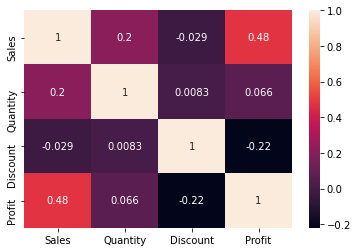

In [11]:
sns.heatmap(corr,annot=True)

#### Discount Vs Profit

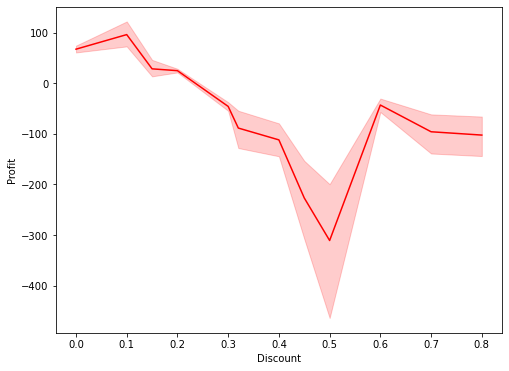

In [12]:
plt.figure(figsize=(8,6))
sns.lineplot(x='Discount',y='Profit',color='red',data=df)

#### Quantity Vs Profit

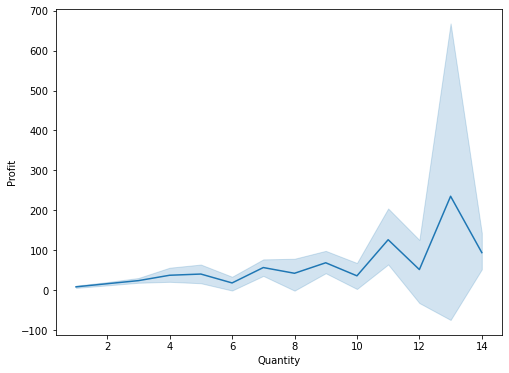

In [13]:
plt.figure(figsize=(8,6))
sns.lineplot(x='Quantity',y='Profit',data=df)

#### Comparing sales by state

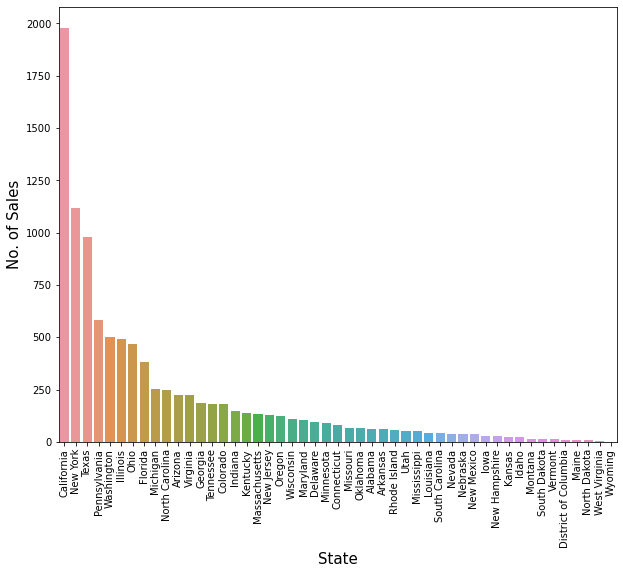

In [14]:
plt.figure(figsize=(10,8))
chart=sns.countplot(x='State',data=df,order=df['State'].value_counts().index)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
chart.set_xlabel("State",fontsize=15)
chart.set_ylabel("No. of Sales",fontsize=15)
plt.show()

#### Category wise Sales

In [15]:
pie=df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
pie

Category
Technology         835774.6410
Furniture          740568.6663
Office Supplies    718256.0700
Name: Sales, dtype: float64

Text(0.5, 1.0, 'Category wise Sales')

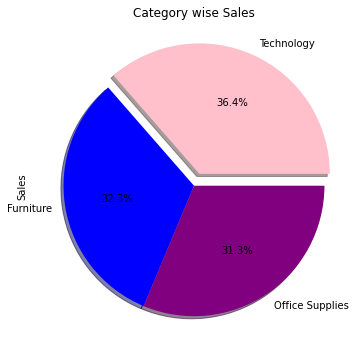

In [16]:
plt.figure(figsize=(8,6))
explode=(0.1,0.0,0.0)
color=['pink','blue','purple']
pie.plot.pie(autopct="%1.1f%%",explode=explode,colors=color,shadow=True)
plt.title('Category wise Sales')

#### Pairwise relationship

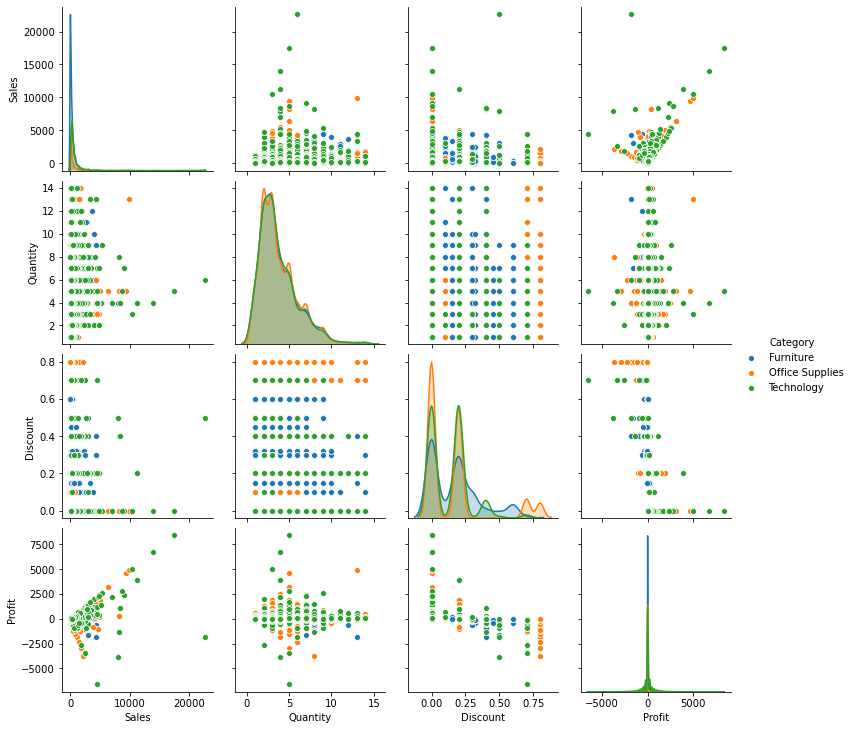

In [17]:
sns.pairplot(df,hue='Category',diag_kind="kde")

In [18]:
df_loss=df[df['Profit']<0]
df_profit=df[df['Profit']>0]

#### Finding profitable ship mode

Text(0, 0.5, 'Negative Profit')

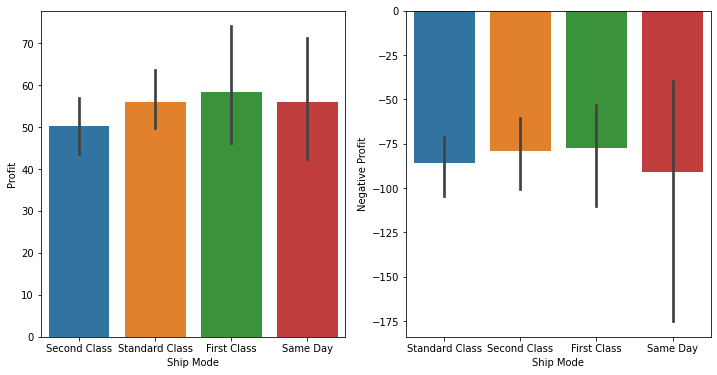

In [19]:
plt.figure(figsize=(12,6))
ax=plt.subplot(121)
sns.barplot(x='Ship Mode',y='Profit',data=df_profit)
ax=plt.subplot(122)
sns.barplot(x='Ship Mode',y='Profit',data=df_loss)
plt.ylabel('Negative Profit')

In [20]:
x=df_profit.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False)
x

Sub-Category
Binders        68704.5319
Copiers        55617.8249
Phones         52023.6759
Accessories    42851.5317
Chairs         36435.9103
Paper          33830.0381
Machines       33503.4251
Storage        27705.1302
Appliances     26767.6466
Furnishings    19532.9668
Tables         14686.6672
Bookcases       8679.6500
Envelopes       6964.1767
Art             6511.8388
Labels          5499.1558
Supplies        1826.5224
Fasteners        982.7134
Name: Profit, dtype: float64

#### Sub-category wise Profit

Text(0.5, 1.0, 'Sub-Category wise Profit')

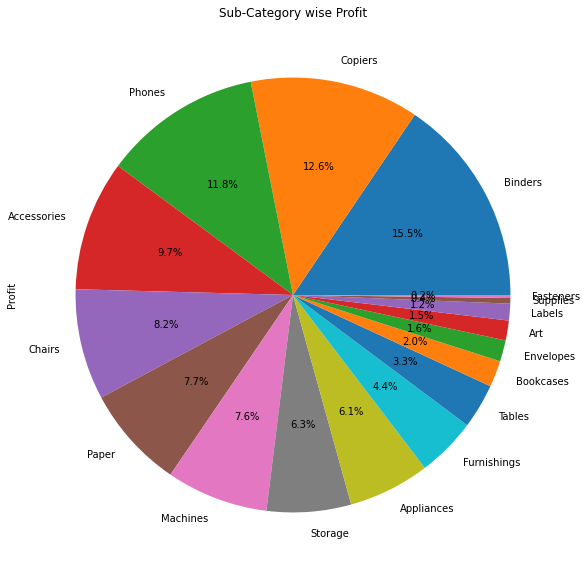

In [21]:
plt.figure(figsize=(10,10))
x.plot.pie(autopct="%1.1f%%")
plt.title('Sub-Category wise Profit')

#### Comparing Sales & Profit among segments

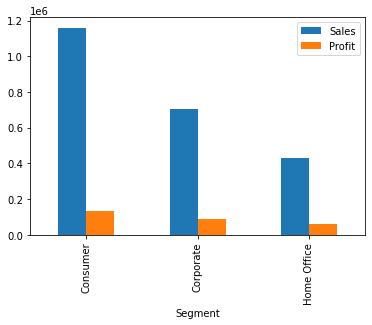

In [22]:
y=df.groupby('Segment')[['Sales','Profit']].sum()
y.plot.bar()